In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP5000
n=5000

#Fitxer que contè en TPM els gens codifcants de PROTEÏNES més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_PROTEIN_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000198712,ENSG00000198899,ENSG00000198938,ENSG00000198804,ENSG00000198886,ENSG00000198763,ENSG00000198888,ENSG00000198727,ENSG00000228253,...,ENSG00000001629,ENSG00000124104,ENSG00000160131,ENSG00000151239,ENSG00000159208,ENSG00000135503,ENSG00000178567,ENSG00000143157,ENSG00000012124,ENSG00000076108
0,Brain - Cortex,59480,57190,43790,51600,48610,32840,36570,32050,32400,...,21.41,22.52,15.53,17.98,8.810,23.11,16.61,23.91,57.9200,19.61
1,Brain - Cerebellum,49380,50440,37730,27340,45150,25620,30180,30980,32770,...,19.32,32.64,20.60,18.94,27.180,26.13,30.63,23.96,2.8010,50.00
2,Brain - Cortex,62980,66050,48110,75880,63390,32590,45930,31380,30880,...,12.93,20.25,13.05,14.43,11.100,23.12,10.95,14.46,9.2890,14.35
3,Brain - Cerebellum,51110,50770,43170,60530,54370,28230,36340,31450,26920,...,16.73,18.82,16.09,14.05,28.160,20.74,26.04,23.36,7.5580,39.01
4,Brain - Cortex,62790,47390,56100,70590,45050,36770,38690,29500,28460,...,10.38,25.89,14.81,10.39,7.415,28.53,12.77,13.41,11.1700,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,60430,54270,52260,54240,42870,26570,36790,26310,35480,...,12.54,22.91,13.06,11.92,10.330,31.81,12.76,12.85,13.4900,15.65
2637,Brain - Cerebellum,44910,49800,38950,39790,52370,29630,35390,31610,24780,...,18.65,21.27,18.44,13.50,22.070,28.04,35.40,21.11,6.3030,47.32
2638,Brain - Cortex,47760,49580,42730,51040,50630,38830,40840,30990,28390,...,14.10,28.84,15.72,17.55,9.872,19.59,15.40,15.36,3.8920,21.81
2639,Brain - Cerebellum,56890,60010,41590,33670,46580,38390,42170,42080,37540,...,21.69,14.05,20.82,18.46,17.230,24.00,26.88,34.46,0.3397,39.70


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

27 components expliquen un 95% de la variança. De 5000 dimensions a 27


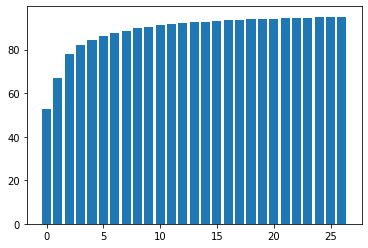

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,20.202363,-9.062852,-14.342508,-7.900388,5.015802,-13.187381,-8.312518,-9.135692,2.075315,-15.421872,...,1.337998,-0.267710,6.773026,4.606568,4.577993,0.879949,-2.995625,1.818046,2.086387,1.617924
1,-73.657560,41.853814,-10.450235,5.668463,4.182028,-2.060582,-0.924016,-6.238265,-0.530833,0.616328,...,0.637660,0.005952,-2.979422,5.657341,2.499640,1.083036,1.189744,-0.932624,0.719501,1.763876
2,76.387730,19.457401,-12.799897,-11.525993,-0.455303,13.675654,4.160552,29.736065,1.823783,-7.422044,...,2.701970,-4.129520,-0.893160,5.130617,-4.771859,-1.003033,-0.837666,-2.960703,2.709679,0.184257
3,120.132290,30.722922,-16.782482,-4.119539,-6.296132,-2.788583,8.514656,-2.510681,-7.891873,0.106526,...,-3.289533,0.628565,-7.720915,-0.481143,-5.088596,-4.025977,-0.386283,5.466716,-1.554696,0.820590
4,45.318030,1.001187,-12.547300,-6.586574,11.502579,-5.701319,11.469589,-3.764361,-5.259608,-1.190387,...,-1.363792,-0.764230,-0.443908,3.115389,0.846096,0.257964,1.964241,-0.099520,-3.130912,3.967966


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,SMTSD
0,20.202363,-9.062852,-14.342508,-7.900388,5.015802,-13.187381,-8.312518,-9.135692,2.075315,-15.421872,...,-0.267710,6.773026,4.606568,4.577993,0.879949,-2.995625,1.818046,2.086387,1.617924,Brain - Hippocampus
1,-73.657560,41.853814,-10.450235,5.668463,4.182028,-2.060582,-0.924016,-6.238265,-0.530833,0.616328,...,0.005952,-2.979422,5.657341,2.499640,1.083036,1.189744,-0.932624,0.719501,1.763876,Brain - Cerebellum
2,76.387730,19.457401,-12.799897,-11.525993,-0.455303,13.675654,4.160552,29.736065,1.823783,-7.422044,...,-4.129520,-0.893160,5.130617,-4.771859,-1.003033,-0.837666,-2.960703,2.709679,0.184257,Brain - Frontal Cortex (BA9)
3,120.132290,30.722922,-16.782482,-4.119539,-6.296132,-2.788583,8.514656,-2.510681,-7.891873,0.106526,...,0.628565,-7.720915,-0.481143,-5.088596,-4.025977,-0.386283,5.466716,-1.554696,0.820590,Brain - Nucleus accumbens (basal ganglia)
4,45.318030,1.001187,-12.547300,-6.586574,11.502579,-5.701319,11.469589,-3.764361,-5.259608,-1.190387,...,-0.764230,-0.443908,3.115389,0.846096,0.257964,1.964241,-0.099520,-3.130912,3.967966,Brain - Frontal Cortex (BA9)


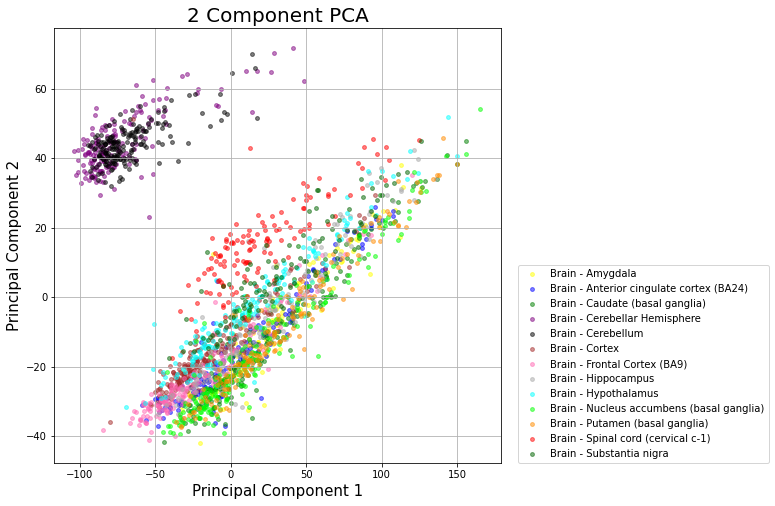

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

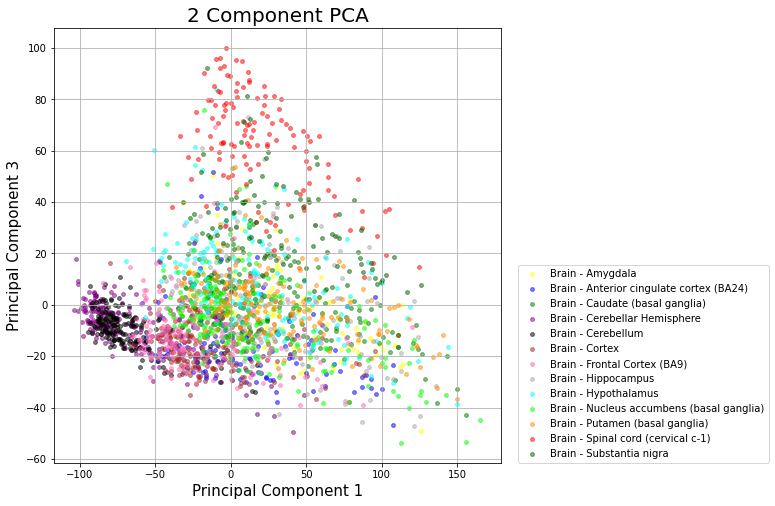

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.011s...
[t-SNE] Computed neighbors for 2112 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 10.520084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.876923
[t-SNE] KL divergence after 1000 iterations: 0.957987


,X,Y,Tipus Teixit
0,-12.553204,-14.365976,Brain - Hippocampus
1,54.360283,-2.503232,Brain - Cerebellum
2,-3.135837,4.195089,Brain - Frontal Cortex (BA9)
3,7.059250,10.635592,Brain - Nucleus accumbens (basal ganglia)
4,2.183858,-10.755950,Brain - Frontal Cortex (BA9)


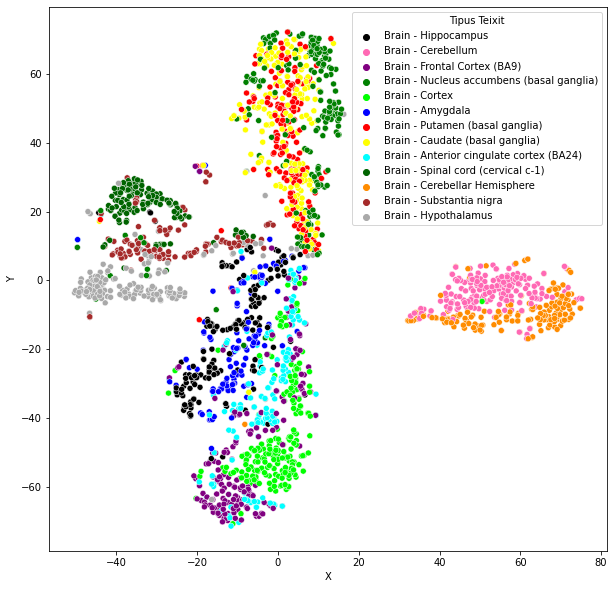

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
30 # Prec. mitjana:  75.71045336671733  desv.:  2.6450875386953414  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
20 # Prec. mitjana:  75.90025038004113  desv.:  2.376334276104098  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
38 # Prec. mitjana:  75.283689528749  desv.:  1.4861599230285647  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
9 # Prec. mitjana:  76.23155682732718  desv.:  1.737640780902852  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
11 # Prec. mitjana:  76.18349280157382  desv.:  2.142962126511714  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
11 # Prec. mitjana:  76.18349280157382  desv.:  2.2252342892264583  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
29 # Prec. mitjana:  75.7111240275418  desv.:  2.311982390806041  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
8 # Prec. mitjana:  76.2315568273272  desv.:  2.3042576995547246  paràmetres:  {'n_neigh

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,23,1,0,0,0,0,1,8,0,1,0,0,0
Brain - Anterior cingulate cortex (BA24),1,17,0,0,0,1,9,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,34,0,0,0,1,1,0,5,11,0,0
Brain - Cerebellar Hemisphere,0,0,0,45,6,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,2,53,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,40,0,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),4,2,0,0,0,1,26,0,0,0,0,0,0
Brain - Hippocampus,8,2,1,0,0,0,1,25,0,0,0,1,3
Brain - Hypothalamus,0,0,0,1,0,0,0,0,32,1,0,2,3


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
53 # Prec. mitjana:  18.371411964589107  desv.:  0.4698482615797671  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
54 # Prec. mitjana:  15.672672806939103  desv.:  0.5465838174045066  paràmetres:  {'C': 0.01, 'gamma': 0.001}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,27,0,0,0,0,1,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,47,0,0,0,0,0,0,1,3,0,0
Brain - Cerebellar Hemisphere,0,0,0,50,1,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,41,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,0,32,0,0,0,0,0,0
Brain - Hippocampus,5,3,0,0,0,0,0,33,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,34,1,0,0,3


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
130 # Prec. mitjana:  51.89305195385854  desv.:  2.8426382374880337  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
130 # Prec. mitjana:  51.89305195385854  desv.:  2.8028519485161167  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
130 # Prec. mitjana:  51.89305195385854  desv.:  2.8028519485161167  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
129 # Prec. mitjana:  52.08262541357418  desv.:  2.828559447449734  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
128 # Prec. mitjana:  52.13001877850309  desv.:  2.8801468700205257  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
127 # Prec. mitjana:  52.177412143432  desv.:  2.8365788771888565  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  38.54041849235447  desv.:  1.6526229627224787  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  32.38509344540821  desv.:  1.6166457352548087  

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,28,2,0,0,0,0,0,1,0,1,1,0,1
Brain - Anterior cingulate cortex (BA24),3,12,0,0,0,4,8,0,0,0,0,0,1
Brain - Caudate (basal ganglia),0,0,29,0,1,1,1,0,0,8,12,0,0
Brain - Cerebellar Hemisphere,0,0,2,36,11,0,0,0,2,0,0,0,0
Brain - Cerebellum,0,0,0,7,44,1,1,0,1,0,1,0,0
Brain - Cortex,0,0,0,0,0,36,4,1,0,0,1,0,0
Brain - Frontal Cortex (BA9),1,3,0,1,0,3,21,0,2,1,1,0,0
Brain - Hippocampus,12,2,1,0,0,0,2,20,2,1,0,0,1
Brain - Hypothalamus,1,0,0,0,0,0,0,1,31,2,0,1,3


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  75.71090047393365  desv.:  2.343366721677686  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
57 # Prec. mitjana:  78.93051953858536  desv.:  2.177538330508366  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  79.49812214969148  desv.:  2.1032425423103454  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
52 # Prec. mitjana:  79.92578020209247  desv.:  2.0276919074175543  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
53 # Prec. mitjana:  79.9255566484843  desv.:  2.626024782426353  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
50 # Prec. mitjana:  80.25775731020298  desv.:  2.1600930173792383  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  76.47031208083699  desv.:  1.9304027003569184  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
51 # Prec. mitjana:  80.06617186801395  desv.:  1.4763778170504034  paràmetres:  {'max_depth': 7, 'n_estimators

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,27,2,0,0,0,0,0,3,1,0,0,0,1
Brain - Anterior cingulate cortex (BA24),2,18,0,0,0,1,7,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,42,0,0,0,1,0,0,1,8,0,0
Brain - Cerebellar Hemisphere,0,0,0,49,2,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,4,51,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,41,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,2,0,0,0,1,29,0,1,0,0,0,0
Brain - Hippocampus,5,2,1,0,0,0,3,30,0,0,0,0,0
Brain - Hypothalamus,0,0,0,0,0,0,0,1,35,1,0,0,2


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 76.61%
Model kNN, Accuracy de test és: 79.21%
##################################################
Model Svm Accuracy: 89.92%
Model Svm, Accuracy de test és: 94.14%
##################################################
Model Arbre de Decisió: 71.50%
Model Arbre de Decisió, Accuracy de test és: 70.89%
##################################################
Model Random Forest: 83.86%
Model Random Forest, Accuracy de test és: 87.33%
